In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

In [9]:

train_dir = 'Train'
test_dir = 'Test'
val_dir = 'Validation'

In [10]:


train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2, activation = "sigmoid")])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)      

In [13]:
model.compile(optimizer = RMSprop(lr=0.001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.98):
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(train_generator, epochs=5, validation_data = val_generator, callbacks = [callbacks])

Epoch 1/5
313/313 [==============================] - 406s 1s/step - loss: 0.4072 - accuracy: 0.8627 - val_loss: 0.1032 - val_accuracy: 0.9812
Epoch 2/5
313/313 [==============================] - 261s 832ms/step - loss: 0.1072 - accuracy: 0.9637 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 3/5
313/313 [==============================] - 256s 818ms/step - loss: 0.0699 - accuracy: 0.9740 - val_loss: 0.0703 - val_accuracy: 0.9850
Epoch 4/5
313/313 [==============================] - 259s 828ms/step - loss: 0.0681 - accuracy: 0.9760 - val_loss: 0.0242 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 267s 854ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0269 - val_accuracy: 0.9925


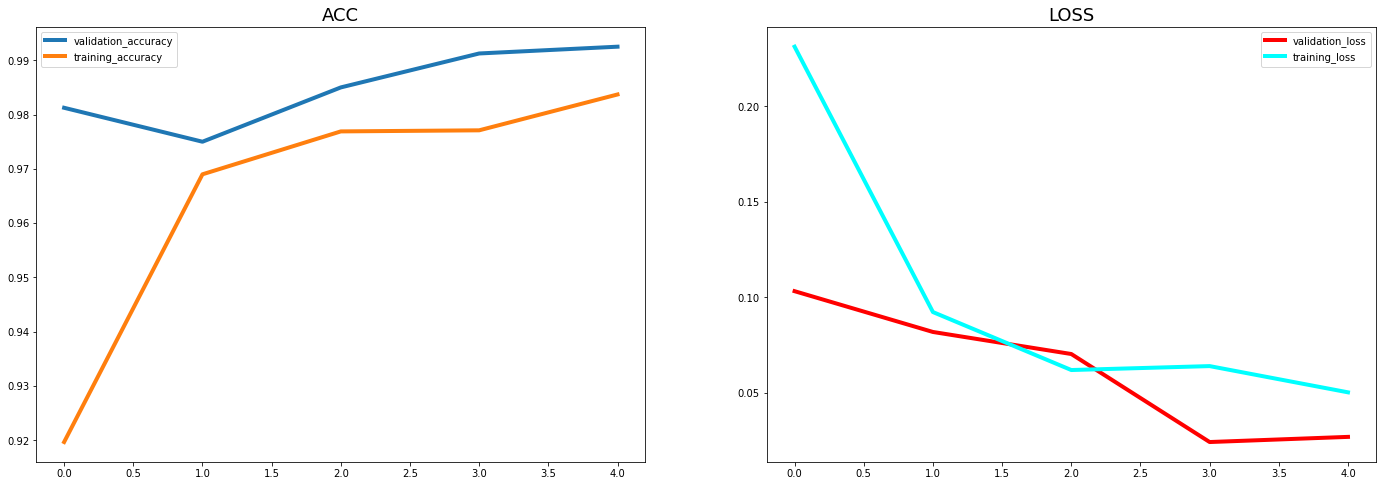

In [15]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", linewidth=4)
plt.legend()
plt.title("ACC" ,fontsize=18)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", color="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", color="cyan", linewidth=4)
plt.legend()

plt.title("LOSS" ,fontsize=18)

plt.show()